# J1201 Figures

In [1]:
# imports
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.ticker as ticker

from qubefit import qube
from qubefit.qfutils import qubebeam

In [2]:
path = '/home/xavier/ALMA/data/J1201/product'

## Instantiate the Qube

In [3]:
Cube = qube.Qube.from_fits(os.path.join(path,'J1201_CUBE_NA.fits'))

## Slice down

In [4]:
# adapt the Cube and Cont to the right sizes
scale = 0.21306  # kpc per pixel
center = [507, 516]
sz = [30, 30]
channels = np.arange(9, 18)
galpos = [498.07, 505.65]
VelocityShift = 0.0

In [5]:
CubeS = Cube.get_slice(xindex=(center[0] - sz[0], center[0] + sz[0] + 1),
                       yindex=(center[1] - sz[1], center[1] + sz[1] + 1))
CubeZ = Cube.get_slice(zindex=channels)

## Simple channel map -- Moment 0

### Do it

In [6]:
Mom0 = CubeS.calculate_moment(moment=0)
Mom0RMS = Mom0.calculate_sigma()

### Figure time

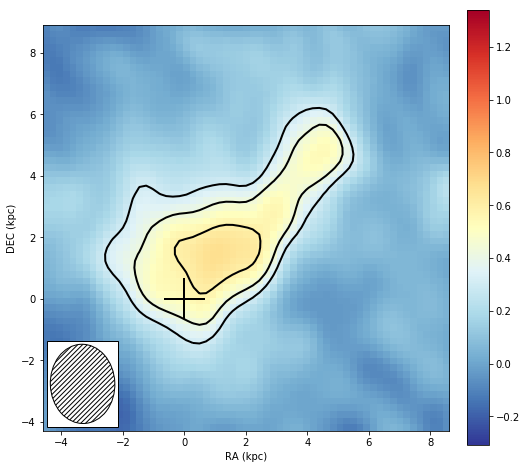

In [15]:
fig = plt.figure(1, (8., 8.))
ax = plt.gca()
# decide on the plot ranges
position = np.array([center[0] - galpos[0] - sz[0],
                     center[0] - galpos[0] + sz[0] + 1,
                     center[1] - galpos[1] - sz[0],
                     center[1] - galpos[1] + sz[1] + 1])
pltrange = np.array([position[0] - 0.5, position[1] + 0.5,
                     position[2] - 0.5, position[3] + 0.5]) * scale

xc = np.linspace(position[0], position[1], 2*sz[0]+1) * scale
yc = np.linspace(position[2], position[3], 2*sz[1]+1) * scale


# Moment - 0
#ax = grid[1]
ax.xaxis.set_major_locator(ticker.MultipleLocator(2.))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.))
vrange = np.array([-3, 13]) * Mom0RMS
d = ax.imshow(Mom0.data, cmap='RdYlBu_r', origin='bottom',
          extent=pltrange, vmin=vrange[0], vmax=vrange[1])
ax.plot([0, 0], np.array([-3, 3]) * scale, lw=2, color='black')
ax.plot(np.array([-3, 3]) * scale, [0, 0], lw=2, color='black')
levels = np.insert(3 * np.power(np.sqrt(1.9), np.arange(10)), 0, -3) * Mom0RMS
ax.contour(xc, yc, Mom0.data, levels=levels, colors='black', linewidths=2)
ax.add_artist(qubebeam(Mom0, ax, scale=scale, loc=3, pad=0.3,
                       fill=None, hatch='/////', color='black'))
norm = mpl.colors.Normalize(vmin=vrange[0], vmax=vrange[1])
cb = plt.colorbar(d, fraction=0.050, pad=0.04, norm=norm)
#cbr = mpl.colorbar.ColorbarBase(grid.cbar_axes[1], cmap='RdYlBu_r',
#                                norm=norm)
ax.set_xlabel('RA (kpc)')
ax.set_ylabel('DEC (kpc)')
plt.show()

## Moment 1

### Build it

In [16]:
Mask = Mom0.mask_region(value=Mom0RMS * 3.0, applymask=False)
CubeSM = CubeS.mask_region(value=0)

In [17]:
Mom1 = CubeS.calculate_moment(moment=1, channels=channels)
Mom2 = CubeSM.calculate_moment(moment=2, channels=channels)
Mom1, Mom2 = CubeS.gaussian_moment(mom1=Mom1, mom2=Mom2)

/home/xavier/anaconda3/lib/python3.7/site-packages/astropy/modeling/functional_models.py:172: RuntimeWarning: divide by zero encountered in double_scalars
  d_amplitude = np.exp(-0.5 / stddev ** 2 * (x - mean) ** 2)
/home/xavier/anaconda3/lib/python3.7/site-packages/astropy/modeling/functional_models.py:173: RuntimeWarning: invalid value encountered in true_divide
  d_mean = amplitude * d_amplitude * (x - mean) / stddev ** 2
/home/xavier/anaconda3/lib/python3.7/site-packages/astropy/modeling/functional_models.py:174: RuntimeWarning: invalid value encountered in true_divide
  d_stddev = amplitude * d_amplitude * (x - mean) ** 2 / stddev ** 3


In [18]:
Mom1.data -= VelocityShift
Mom1 = Mom1.mask_region(mask=Mask)
Mom2 = Mom2.mask_region(mask=Mask)

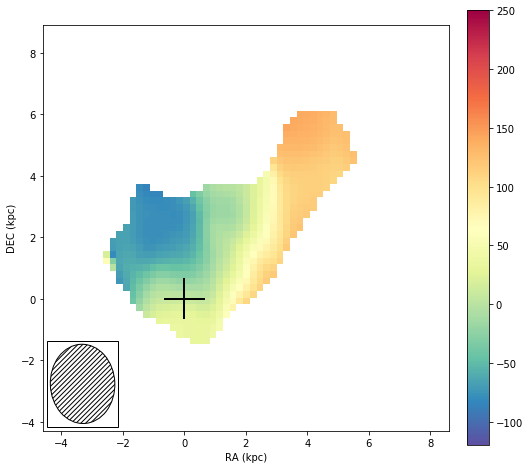

In [21]:
fig = plt.figure(1, (8., 8.))
ax = plt.gca()
# Moment - 1
#ax = grid[2]
ax.xaxis.set_major_locator(ticker.MultipleLocator(2.))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.))
vrange = np.array([-120, 250])
d = ax.imshow(Mom1.data, cmap='Spectral_r', origin='bottom',
          extent=pltrange, vmin=vrange[0], vmax=vrange[1])
ax.plot([0, 0], np.array([-3, 3]) * scale, lw=2, color='black')
ax.plot(np.array([-3, 3]) * scale, [0, 0], lw=2, color='black')
ax.add_artist(qubebeam(Mom1, ax, scale=scale, loc=3, pad=0.3,
                       fill=None, hatch='/////', color='black'))
norm = mpl.colors.Normalize(vmin=vrange[0], vmax=vrange[1])
#cbr = mpl.colorbar.ColorbarBase(grid.cbar_axes[2], cmap='Spectral_r',
#                                norm=norm)
cb = plt.colorbar(d, fraction=0.050, pad=0.04, norm=norm)
xline = np.array([-15, 15]) * scale
ax.set_xlabel('RA (kpc)')
ax.set_ylabel('DEC (kpc)')
plt.show()

## Moment 2

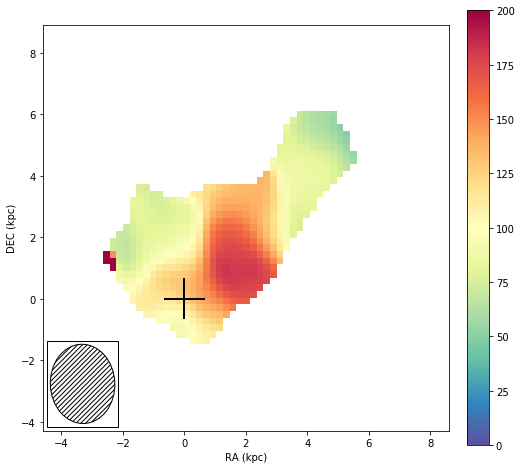

In [23]:
fig = plt.figure(1, (8., 8.))
ax = plt.gca()

ax.xaxis.set_major_locator(ticker.MultipleLocator(2.))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.))
vrange = np.array([0, 200])
d = ax.imshow(Mom2.data, cmap='Spectral_r', origin='bottom',
          extent=pltrange, vmin=vrange[0], vmax=vrange[1])
ax.plot([0, 0], np.array([-3, 3]) * scale, lw=2, color='black')
ax.plot(np.array([-3, 3]) * scale, [0, 0], lw=2, color='black')
ax.add_artist(qubebeam(Mom2, ax, scale=scale, loc=3, pad=0.3,
                       fill=None, hatch='/////', color='black'))
norm = mpl.colors.Normalize(vmin=vrange[0], vmax=vrange[1])
cb = plt.colorbar(d, fraction=0.050, pad=0.04, norm=norm)
ax.set_xlabel('RA (kpc)')
ax.set_ylabel('DEC (kpc)')
plt.show()